In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

In [85]:
iris = datasets.load_iris()
#iris dataset found here:http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
#column names: Sepal Length, Sepal Width, Petal Length and Petal Width

In [86]:
type(iris['data'])

numpy.ndarray

In [87]:
iris['data'].shape

(150, 4)

In [88]:
X = iris['data'][:,:2] #using Sepal Length, Sepal Width

In [89]:
y = iris['target']
iris['target'].shape

(150,)

In [130]:
svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("linear_svc", SVC(C=1, kernel='linear', degree=1,
                                     decision_function_shape='ovo')),
))

In [131]:
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [133]:
print "Accuracy Score: " ,svm_clf.score(X,y)

Accuracy Score:  0.8133333333333334


In [139]:
Z = svm_clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

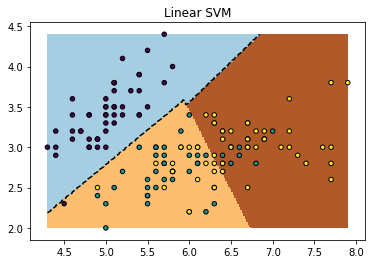

In [143]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')

plt.title('Linear SVM')
plt.show()

The above predicts well class 0 but does not do well with classes 1 & 2
Let's try different kernels and nonlinear transformations and see if that helps

In [144]:
from sklearn.model_selection import GridSearchCV

In [150]:
svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("SVC", SVC(C=1, kernel='rbf', degree=1,
                                     decision_function_shape='ovo')),
))

In [164]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(svm_clf,
                         dict(SVC__kernel=['linear','rbf','poly'],
                             SVC__degree=[1,2,3,4,5],
                             SVC__C = [.001, .01, .1, 1,20,100]))

In [165]:
estimator.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)))),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SVC__degree': [1, 2, 3, 4, 5], 'SVC__kernel': ['linear', 'rbf', 'poly'], 'SVC__C': [0.001, 0.01, 0.1, 1, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
estimator.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [168]:
print "Accuracy Score: " ,estimator.best_estimator_.score(X,y)

Accuracy Score:  0.8


In [169]:
Z = estimator.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

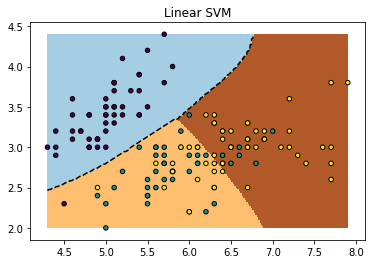

In [170]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')

plt.title('Best SVM Estimator (RBF Kernel)')
plt.show()

Strangely, our accuracy has decreased... will investigate why, but the decision boundaries have indeed slightly changed